In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_csv("./melb_data.csv")
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,NaN,NaN,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,NaN,NaN,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [3]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
df.shape

(13580, 21)

In [5]:
correlation = df[['Suburb', 'Postcode']].apply(lambda x: pd.factorize(x)[0]).corr()
correlation

,Suburb,Postcode
Suburb,1.000000,0.894455
Postcode,0.894455,1.000000


In [6]:
df1 = df.drop(['Address', 'Method', 'SellerG', 'Date', 'Lattitude', 'Longtitude', 'Regionname', 'Postcode', 'CouncilArea'], axis=1)
df1.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
1,Abbotsford,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
2,Abbotsford,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
3,Abbotsford,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,4019.0
4,Abbotsford,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0


In [7]:
df1.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,7454.417378
std,0.955748,6.393107e+05,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,4378.581772
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,249.000000
25%,2.000000,6.500000e+05,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,4380.000000
50%,3.000000,9.030000e+05,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,6555.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,10331.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,21650.000000


In [8]:
df1["Suburb"].nunique()

314

In [9]:
df1.groupby("Type")["Type"].agg('count')
#h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse

Type
h    9449
t    1114
u    3017
Name: Type, dtype: int64

# Data Cleaning

## Handle NA values

In [10]:
df1.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
Propertycount       0
dtype: int64

In [11]:
df1["BuildingArea"].fillna(df1["BuildingArea"].mean(), inplace=True)
df1["YearBuilt"].fillna(df1["YearBuilt"].median(), inplace=True)
df1.isna().sum()

Suburb            0
Rooms             0
Type              0
Price             0
Distance          0
Bedroom2          0
Bathroom          0
Car              62
Landsize          0
BuildingArea      0
YearBuilt         0
Propertycount     0
dtype: int64

In [12]:
df1.dropna(inplace=True)
df1.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Propertycount    0
dtype: int64

## Convert data types

In [13]:
df1["Bathroom"].unique()

array([1., 2., 3., 4., 0., 7., 5., 6., 8.])

In [14]:
df1["Bedroom2"] = df1["Bedroom2"].astype(int)
df1["Bathroom"] = df1["Bathroom"].astype(int)
df1["Car"] = df1["Car"].astype(int)
df1.head()

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,Abbotsford,2,h,1480000.0,2.5,2,1,1,202.0,151.96765,1970.0,4019.0
1,Abbotsford,2,h,1035000.0,2.5,2,1,0,156.0,79.00000,1900.0,4019.0
2,Abbotsford,3,h,1465000.0,2.5,3,2,0,134.0,150.00000,1900.0,4019.0
3,Abbotsford,3,h,850000.0,2.5,3,2,1,94.0,151.96765,1970.0,4019.0
4,Abbotsford,4,h,1600000.0,2.5,3,1,2,120.0,142.00000,2014.0,4019.0


In [15]:
df1[df1["Landsize"] == 0].shape[0]

1939

In [16]:
df1 = df1[df1['Landsize'] != 0]
df1.shape

(11579, 12)

In [17]:
df1[df1["BuildingArea"] == 0].shape[0]

17

In [18]:
df1 = df1[df1['BuildingArea'] != 0]
df1.shape

(11562, 12)

In [19]:
df1["YearBuilt"].unique()

array([1970., 1900., 2014., 1910., 1890., 2005., 1880., 1985., 2013.,
       2012., 1920., 1950., 1998., 1930., 2016., 2009., 1980., 2011.,
       2015., 1975., 1993., 1960., 2003., 1995., 2010., 1996., 1925.,
       2004., 2008., 1962., 1955., 1988., 1953., 1997., 1990., 1965.,
       2007., 1967., 2000., 1889., 1888., 1934., 1935., 1938., 1887.,
       1904., 1978., 1939., 1940., 2006., 1945., 1947., 1958., 2017.,
       1999., 1992., 1961., 1928., 1977., 1976., 2001., 1948., 1927.,
       1981., 1943., 1974., 1957., 1986., 1926., 2002., 1994., 1966.,
       1949., 1905., 1912., 1924., 1991., 1942., 1973., 1972., 1969.,
       1915., 2018., 1916., 1982., 1971., 1963., 1897., 1919., 1923.,
       1983., 1903., 1830., 1937., 1908., 1913., 1917., 1885., 1902.,
       1854., 1850., 1898., 1941., 1951., 1946., 1989., 1956., 1968.,
       1984., 1901., 1987., 1959., 1979., 1933., 1886., 1929., 1906.,
       1870., 1932., 1875., 1863., 1918., 1893., 1856., 1860., 1894.,
       1914., 1868.,

In [20]:
df1[df1["Bedroom2"] == 20]

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
7404,Caulfield East,3,h,1650000.0,9.3,20,1,2,875.0,151.96765,1970.0,608.0


In [21]:
len(df1.Suburb.unique())

312

In [22]:
df1.Suburb = df1.Suburb.apply(lambda x: x.strip())

suburb_count = df1.groupby('Suburb')['Suburb'].agg('count').sort_values(ascending=False)
suburb_count

Suburb
Reservoir             337
Bentleigh East        240
Preston               230
Richmond              195
Brunswick             186
                     ... 
Beaconsfield Upper      1
Hurstbridge             1
Healesville             1
Plumpton                1
Croydon South           1
Name: Suburb, Length: 312, dtype: int64

In [23]:
suburb_count_less_than_10 = suburb_count[suburb_count <= 10]
len(suburb_count_less_than_10)

111

In [24]:
df1["price_per_m2"] = df1["Price"]/df1["Landsize"]
df1

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2
0,Abbotsford,2,h,1480000.0,2.5,2,1,1,202.0,151.96765,1970.0,4019.0,7326.732673
1,Abbotsford,2,h,1035000.0,2.5,2,1,0,156.0,79.00000,1900.0,4019.0,6634.615385
2,Abbotsford,3,h,1465000.0,2.5,3,2,0,134.0,150.00000,1900.0,4019.0,10932.835821
3,Abbotsford,3,h,850000.0,2.5,3,2,1,94.0,151.96765,1970.0,4019.0,9042.553191
4,Abbotsford,4,h,1600000.0,2.5,3,1,2,120.0,142.00000,2014.0,4019.0,13333.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,16.7,4,2,2,652.0,151.96765,1981.0,7392.0,1909.509202
13576,Williamstown,3,h,1031000.0,6.8,3,2,2,333.0,133.00000,1995.0,6380.0,3096.096096
13577,Williamstown,3,h,1170000.0,6.8,3,2,4,436.0,151.96765,1997.0,6380.0,2683.486239
13578,Williamstown,4,h,2500000.0,6.8,4,1,5,866.0,157.00000,1920.0,6380.0,2886.836028


In [25]:
df1["m2_per_room"] = df1["Landsize"]/df1["Rooms"]
df1.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2,m2_per_room
count,11562.000000,1.156200e+04,11562.000000,11562.000000,11562.000000,11562.000000,11562.000000,11562.000000,11562.000000,11562.000000,11562.000000,11562.000000
mean,3.101453,1.146444e+06,10.788549,3.074382,1.585279,1.691316,651.767341,158.475968,1965.440581,7323.012022,3345.676335,235.362723
std,0.894775,6.479161e+05,5.933404,0.911252,0.707835,0.992372,4316.134488,423.713144,29.628668,4405.751032,10089.093119,1483.058920
min,1.000000,1.310000e+05,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1196.000000,249.000000,6.235364,0.333333
25%,3.000000,7.120000e+05,6.900000,3.000000,1.000000,1.000000,272.000000,132.000000,1960.000000,4019.000000,1385.638503,95.000000
50%,3.000000,9.700000e+05,10.300000,3.000000,1.000000,2.000000,534.000000,151.967650,1970.000000,6482.000000,2359.064644,152.000000
75%,4.000000,1.400000e+06,13.500000,4.000000,2.000000,2.000000,676.000000,151.967650,1970.000000,9758.000000,3943.550895,208.000000
max,10.000000,9.000000e+06,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,21650.000000,710000.000000,144338.000000


In [26]:
df2 = df1[~(df1["m2_per_room"]<=25)]
df2.shape

(11518, 14)

In [27]:
df2.price_per_m2.describe()

count    11518.000000
mean      3088.371490
std       2549.658939
min          6.235364
25%       1383.710271
50%       2350.249543
75%       3913.043478
max      24404.761905
Name: price_per_m2, dtype: float64

## Remove outliers of price_per_m2 beyond one standard deviation of the mean

In [28]:
def remove_outliers_ppm2(df):
    new_df = pd.DataFrame()
    for key, sdf in df.groupby('Suburb'):
        mean = sdf.price_per_m2.mean()
        std = sdf.price_per_m2.std()
        new_sdf = sdf[(sdf.price_per_m2 >= (mean-std)) & (sdf.price_per_m2 <= (mean+std))]
        new_df = pd.concat([new_df, new_sdf], ignore_index=True)
    return new_df

In [29]:
df3 = remove_outliers_ppm2(df2)
df3.shape

(8877, 14)

In [34]:
def scatter_plot_ppm2(df, suburb):
    sdf = df[df['Suburb'] == suburb]
    b2 = sdf[sdf['Bedroom2'] == 2] 
    b3 = sdf[sdf['Bedroom2'] == 3]
             
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(b2['Landsize'], b2['price_per_m2'], color="red", label='2 bedroom', s=50) 
    plt.scatter(b3['Landsize'], b3['price_per_m2'], color="blue", label='3 bedroom', s=50)
    
    plt.legend()
    plt.xlabel("Landsize")
    plt.ylabel("Price per m2")
    plt.title(suburb)


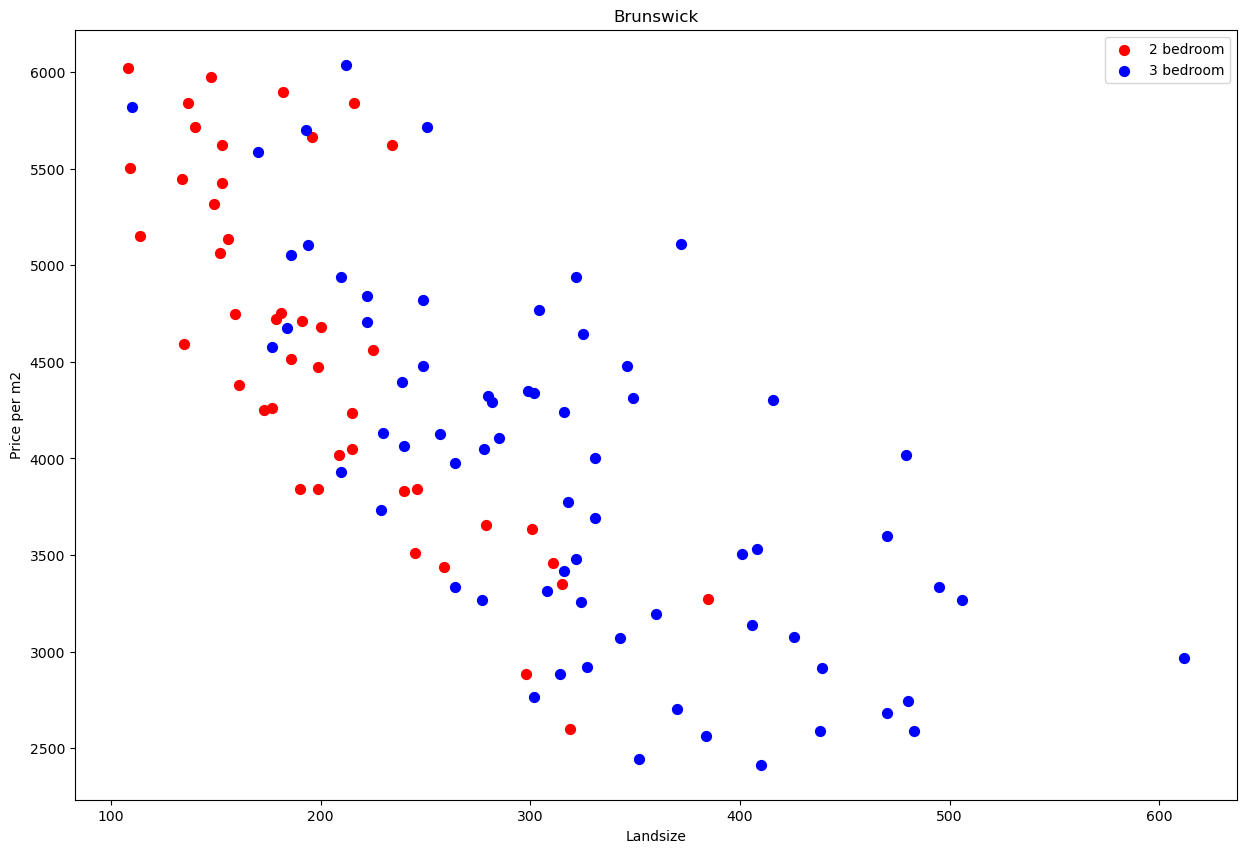

In [36]:
scatter_plot_ppm2(df3, 'Brunswick')

In [37]:
def scatter_plot_price(df, suburb):
    sdf = df[df['Suburb'] == suburb]
    b2 = sdf[sdf['Bedroom2'] == 2] 
    b3 = sdf[sdf['Bedroom2'] == 3]
             
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(b2['Landsize'], b2['Price'], color="red", label='2 bedroom', s=50) 
    plt.scatter(b3['Landsize'], b3['Price'], color="blue", label='3 bedroom', s=50)
    
    plt.legend()
    plt.xlabel("Landsize")
    plt.ylabel("Price")
    plt.title(suburb)

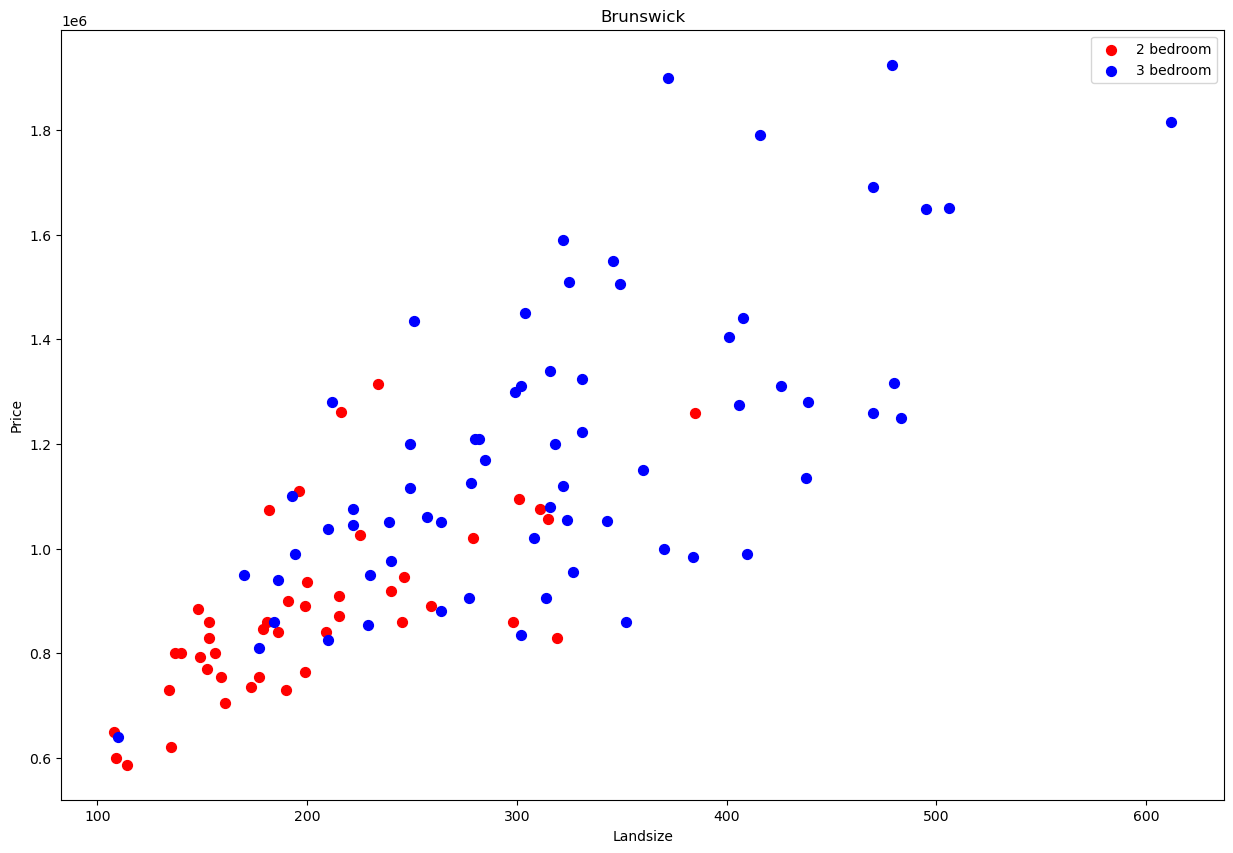

In [38]:
scatter_plot_price(df3, "Brunswick")

Text(0, 0.5, 'Count')

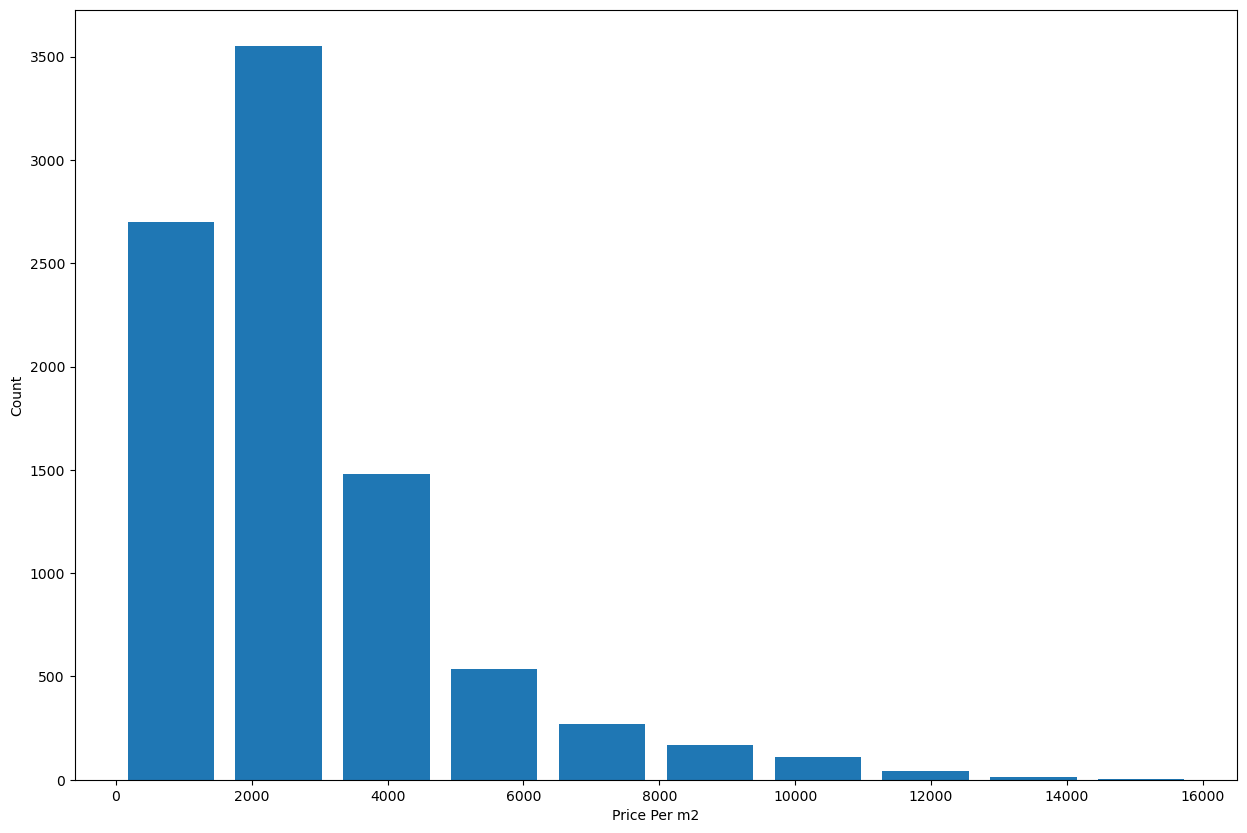

In [42]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df3.price_per_m2, rwidth=0.8)
plt.xlabel("Price Per m2")
plt.ylabel("Count")

In [45]:
df3[df3.Bathroom > 4]

,Suburb,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,price_per_m2,m2_per_room
436,Ashburton,8,h,2950000.0,11.0,9,7,4,1472.0,618.00000,2009.0,3052.0,2004.076087,184.000000
534,Avondale Heights,4,h,1200000.0,10.5,4,5,4,673.0,151.96765,1970.0,4502.0,1783.060921,168.250000
602,Balwyn,5,h,3250000.0,9.7,5,5,2,651.0,410.00000,1970.0,5682.0,4992.319508,130.200000
627,Balwyn,5,h,3000000.0,9.7,5,5,2,671.0,151.96765,1970.0,5682.0,4470.938897,134.200000
628,Balwyn,5,h,3400000.0,9.7,5,6,4,739.0,502.00000,1970.0,5682.0,4600.811908,147.800000
666,Balwyn,5,h,2580000.0,7.9,5,5,2,621.0,575.00000,2009.0,5682.0,4154.589372,124.200000
721,Balwyn North,5,h,4000000.0,9.2,5,5,4,1364.0,518.00000,2013.0,7809.0,2932.551320,272.800000
1318,Brighton,5,h,2100000.0,11.2,5,5,2,552.0,219.00000,1920.0,10579.0,3804.347826,110.400000
1381,Brighton,5,h,5500000.0,10.5,5,5,2,830.0,151.96765,1970.0,10579.0,6626.506024,166.000000
1417,Brighton East,5,h,3207000.0,10.7,5,5,3,1561.0,272.00000,1969.0,6938.0,2054.452274,312.200000
